<a href="https://colab.research.google.com/github/allanbmartins/Perceptron_simples_digitos_PYTHON/blob/main/perceptron_simples_digitos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#ALGORITMO PARA CÁLCULO DO PERCEPTRON SIMPLES - PYTHON



###INSTRUÇÕES

####1- Este algoritmo pode usar a quantidade de entradas que quiser e a quantidade de amostras também que quiser, contanto que mantenha o 1º elemento sendo o Baias e o restante os itens Xn. A mesma estrutura para a amostra de teste.

####2- Repartir cada dígito da amostra **"2345678"** (***exemplo usado como divisor de classe***) para cada entrada de Xn e colocar no topo.

####3- Repetir o mesmo para as amostra seguintes que serão testados de forma aleatória (completa) ou  objetiva (mínima):
* Completa = Grande quantidade de amostras aleatórias
* Mínima = 7 amostras com valores abaixo e 7 amostras com valores acima do alvo, com valores abaixo e acima em cada hipotese dos dígitos Xn.


####4- Definir o valor limiar de ativação (normalmente 0).

####5- Definir a taxa de aprendizagem (começando com 00.1 e não passando de 2.0).

####6- Definir a quantidade de séries/iterações da primeira vez (sugiro começar com 50.0), o resultado dessa amostra de teste anexa só foi satisfatória com uma série de 100000.00.

###OBJETIVO



####Criar teste para verificar se o valor colocado de entrada está menor (-1) ou maior (+1) do que o divisor de classe "2345678", obtendo ao final do treinamento o neurônio treinado com os pesos Bias + Xn...Xn para criação da fórmula de cálculo.

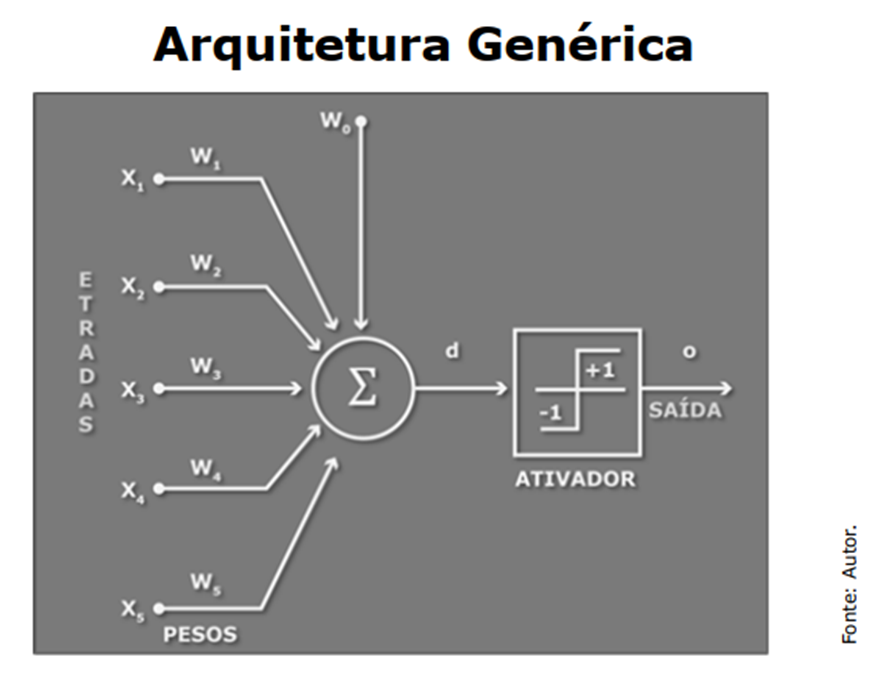

#####Instalação das bibliotécas pandas e numpy caso não esteja instalado

In [ ]:
pip install pandas # Instalar biblioteca pandas caso não tenha

In [ ]:
pip install numpy # Instalar biblioteca numpy caso não tenha

In [ ]:
import pandas as pd # Importar biblioteca pandas
import numpy as np # Importar biblioteca numpy
from google.colab import files # Biblioteca para importar arquivo para inidade local

#####Importação dos arquivos com amostras para treinamento/alvo e teste/alvo

In [ ]:
#Importar para vetor com amostras de ('Bias_x0' valor de bias e 'x1','x2','x3','x4','x5','x6','x7' valor dos dígitos para amostra de treinamento)
with open('/content/01_amostra.csv') as file_name:
    x_amostra = np.loadtxt(file_name, delimiter=";")  # Importar para vetor o arquivo para análise da atividade prática '01_amostra'

#Importar para vetor com saídas esperadas treinamento
with open('/content/02_alvo.csv') as file_name:
    y_alvo = np.loadtxt(file_name, delimiter=";")  # Importar para vetor o arquivo para análise da atividade prática '02_alvo.csv'

#Importar para vetor com amostras para teste treinamento
with open('/content/03_teste.csv') as file_name:
    r_teste = np.loadtxt(file_name, delimiter=";") # Importar para vetor o arquivo para análise da atividade prática '03_teste.csv'

#Importar para vetor saídas esperadas para teste
with open('/content/04_teste_alvo.csv') as file_name:
    r_teste_alvo = np.loadtxt(file_name, delimiter=";") # Importar para vetor o arquivo para análise da atividade prática '04_teste_alvo.csv'

print('As Amostras são: ',x_amostra, '\n') #Exibe vetor criado
print('Os Alvos são: ',y_alvo, '\n') #Exibe vetor criado
print('Os RU para teste são: ',r_teste, '\n') #Exibe vetor criado
print('Os alvos dos RU para teste são: ',r_teste_alvo, '\n') #Exibe vetor criado

#####*Função* do perceptron simples

In [ ]:
def perceptron_simples_treino(x_amostra, y_alvo, lim, tax, series): # Função do perceptron simples
    """Realiza o cálculo do perceptron.
    x_amostra: dados de entrada para treinamento
    y_alvo: saída esperada já conhecida
    lim: limiar de ativação
    tax: Taxa de aprendizado
    series: número de séries ou iterações reslizadas para o treinamento
    """
    vet_pesos = np.zeros(len(x_amostra[0])) #inicializando o vetor de pesos
    n = 0 #valor de inicio da iteração
    y_resp_vet = np.ones(len(y_alvo)) #criando o vetor de resposta de saída da rede
    error = np.ones(len(y_alvo)) # criando o vetor de erros
    vet_resultados = [] #vetor J que irá receber o resultado do erro do treinamento.
 
    while n < series: 
      for i in range(0, len(x_amostra)): 
        soma = np.dot(x_amostra[i], vet_pesos) #calcular somatório dos pesos com os dados de entrada
        if soma > lim: #Condicional da função de ativação
          y_resp = 1 #Se > 0 então +1
        else:
          y_resp = -1 #Se < 0 então -1
        y_resp_vet[i] = y_resp

        for j in range(0, len(vet_pesos)): #Laço para  atualização dos pesos no vetor de pesos
          vet_pesos[j] = vet_pesos[j] + tax*(y_alvo[i] - y_resp)*x_amostra[i][j]
        n += 1 # Incremento para loop
      
      for i in range(0,len(y_alvo)):  #Laço para calcular a soma dos erros quadraticos médios   
          error[i] = (y_alvo[i]-y_resp_vet[i])**2
      vet_resultados.append(0.5*np.sum(error))
    
    return vet_pesos, vet_resultados

#Configurações 
lim = 0.00 # Valor de limiar de ativação
tax = 0.01 # Valor de Taxa de Aprendizagem
series = 100000.0 # Quantidade de séries/iterações serão realizadas, esse valor tem que ser ajustado até o erro ser zerado

#Criação de vetor com pesos e a soma dos quadrados
pesos = (perceptron_simples_treino(x_amostra, y_alvo, lim, tax, series)[0])
somaquad = (perceptron_simples_treino(x_amostra, y_alvo, lim, tax, series)[1])

#####Criação de dataframe com multiplicações dos pesos finais x  itens para teste

In [ ]:
produtos_teste = np.multiply(pesos,r_teste) # Multiplicação dos pesos final * amostra(n) do dataframe 
df_r_teste_alvo = pd.DataFrame(r_teste_alvo, columns = ['Alvo'])
df_produtos_teste = pd.DataFrame(produtos_teste, columns = ['Bias_x0','x1','x2','x3','x4','x5','x6','x7'])
df_produtos_teste = df_produtos_teste.eval('Soma = Bias_x0+x1+x2+x3+x4+x5+x6+x7') # Soma pesos final * amostra(n)
df_produtos_teste['Alvo'] = df_r_teste_alvo['Alvo']
df_produtos_teste['Alvo2'] = ['1.0' if s >0 else '-1.0' for s in df_r_teste_alvo['Alvo']] # Condifional de teste se -1 ou +1
df_produtos_teste['Resultado'] = ['1.0' if s >0 else '-1.0' for s in df_produtos_teste['Soma']] # Condifional de teste se CORRETO ou ERRADO
df_produtos_teste['Resposta'] = df_produtos_teste.apply(lambda x: 'CORRETO' if x['Alvo2']==x['Resultado'] else 'ERRADO', axis=1) # Condifional de teste se CORRETO ou ERRADO
#print(df_produtos_teste)

#####Criação de dataframe consolidador com itens treinados, soma, alvo, resposta e resultado 

In [ ]:
df_produtos_teste_completo = pd.DataFrame(r_teste, columns = ['Bias_x0','x1','x2','x3','x4','x5','x6','x7'])
df_produtos_teste_completo['Soma'] = df_produtos_teste['Soma']
df_produtos_teste_completo['Alvo'] = df_produtos_teste['Alvo']
df_produtos_teste_completo['Soma'] = df_produtos_teste['Soma']
df_produtos_teste_completo['Resultado'] = df_produtos_teste['Resultado']
df_produtos_teste_completo['Resposta'] = df_produtos_teste['Resposta']

#####Exibição de quadro final, pesos finais, erro ao quadrado e quantidade de series/iterações

In [ ]:
print(df_produtos_teste_completo, "\n") # Exibe quadro completo com amostra de teste, soma, alvo, resultado e resposta
print("Vetor de pesos: ", pesos, "\n") # Exibe quadro de pesos finais 
print("A soma dos erros quadraticos é: ", somaquad, "\n") # Exibe erro quadraticos
print(f'Quantidade de series/iterações realizadas para o treinamento: {series:.0f}', "\n")

#####Exportar vetor de pesos e dataframe final

In [ ]:
#Exportar vetor de pesos e dataframe final
pd.DataFrame(pesos).to_excel('/content/05_quadro_pesos.xlsx') # Exportar para arquivo do excel
df_produtos_teste.to_excel('/content/06_calculo_pesos_amostra_teste.xlsx') # Exportar para arquivo do excel
df_produtos_teste_completo.to_excel('/content/07_quadro_completo_amostra_teste.xlsx') # Exportar para arquivo do excel


###Referencias:

Implementação do perceptron simples - representação computacional do modelo matemático - Adriano Santos [https://www.youtube.com/watch?v=6hapXAGcgQA]

Redes Neurais: Exemplo do Aprendizado Delta no Perceptron - 
Fernando dos Santos [https://www.youtube.com/watch?v=TVzysIdNZYw]


Inteligência Artificial na Prática - Profº João Marcos [https://www.youtube.com/watch?v=ZfIb__rg2As&t=122s]

